# Implementing Hypothesis Testing Procedures

## 📚 Learning Objectives

By completing this notebook, you will:
- Implement hypothesis testing procedures
- Understand null and alternative hypotheses
- Perform t-tests, z-tests, and chi-square tests
- Interpret test results and make decisions

## 🔗 Prerequisites

- ✅ Understanding of probability distributions
- ✅ Understanding of sampling and estimation
- ✅ Python, NumPy, SciPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 5**:
- Implementing hypothesis testing procedures
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 5 Practical Content

---

## Introduction

**Hypothesis testing** is a statistical method for making decisions about population parameters based on sample data. We test a null hypothesis against an alternative hypothesis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("✅ Libraries imported!")
print("\nImplementing Hypothesis Testing Procedures")
print("=" * 60)

✅ Libraries imported!

Implementing Hypothesis Testing Procedures


## Part 1: One-Sample t-Test


Part 1: One-Sample t-Test

Sample statistics:
  Sample mean: 48.1185
  Sample std: 9.0001
  Sample size: 30

Hypothesis Test:
  H0: μ = 50
  H1: μ ≠ 50
  Significance level (α): 0.05

Results:
  t-statistic: -1.1450
  p-value: 0.261564

  Decision: Fail to reject H0 (p ≥ α)
  Conclusion: No significant evidence that mean differs from 50


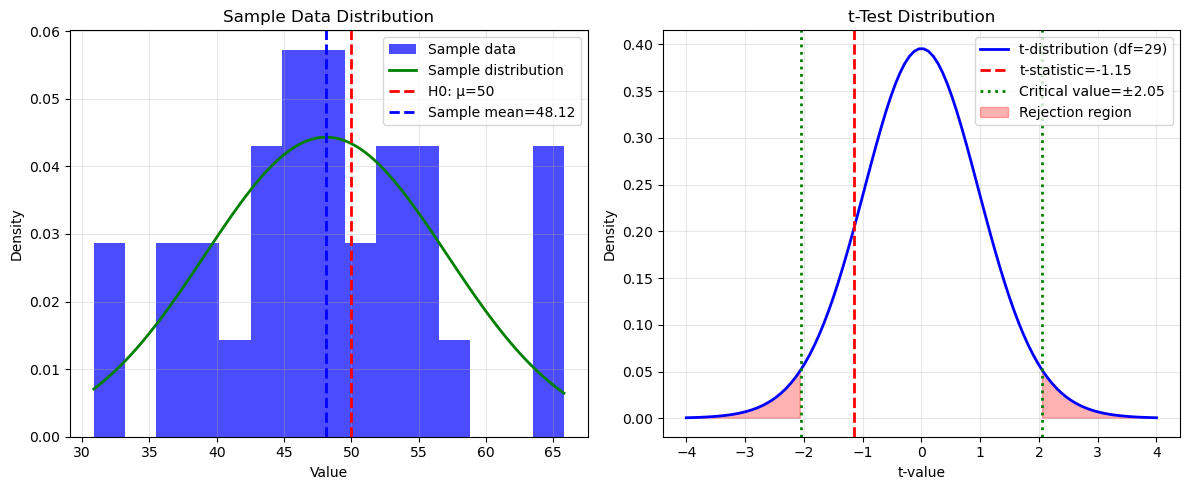


✅ One-sample t-test performed!


In [2]:
print("=" * 60)
print("Part 1: One-Sample t-Test")
print("=" * 60)

# Generate sample data
np.random.seed(42)
true_mean = 50
population_std = 10
sample_size = 30
sample = np.random.normal(true_mean, population_std, sample_size)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

print(f"\nSample statistics:")
print(f"  Sample mean: {sample_mean:.4f}")
print(f"  Sample std: {sample_std:.4f}")
print(f"  Sample size: {sample_size}")

# Hypothesis test: H0: μ = 50, H1: μ ≠ 50
hypothesized_mean = 50
alpha = 0.05  # Significance level

# Perform t-test
t_statistic, p_value = stats.ttest_1samp(sample, hypothesized_mean)

print(f"\nHypothesis Test:")
print(f"  H0: μ = {hypothesized_mean}")
print(f"  H1: μ ≠ {hypothesized_mean}")
print(f"  Significance level (α): {alpha}")
print(f"\nResults:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value: {p_value:.6f}")

# Decision
if p_value < alpha:
    print(f"\n  Decision: Reject H0 (p < α)")
    print(f"  Conclusion: Sample mean is significantly different from {hypothesized_mean}")
else:
    print(f"\n  Decision: Fail to reject H0 (p ≥ α)")
    print(f"  Conclusion: No significant evidence that mean differs from {hypothesized_mean}")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample, bins=15, density=True, alpha=0.7, color='blue', label='Sample data')
x = np.linspace(sample.min(), sample.max(), 100)
plt.plot(x, stats.norm.pdf(x, sample_mean, sample_std), 'g-', linewidth=2, label='Sample distribution')
plt.axvline(hypothesized_mean, color='r', linestyle='--', linewidth=2, label=f'H0: μ={hypothesized_mean}')
plt.axvline(sample_mean, color='b', linestyle='--', linewidth=2, label=f'Sample mean={sample_mean:.2f}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Sample Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df = sample_size - 1
x = np.linspace(-4, 4, 100)
t_dist = stats.t.pdf(x, df)
plt.plot(x, t_dist, 'b-', linewidth=2, label=f't-distribution (df={df})')
plt.axvline(t_statistic, color='r', linestyle='--', linewidth=2, label=f't-statistic={t_statistic:.2f}')
critical_value = stats.t.ppf(1 - alpha/2, df)
plt.axvline(critical_value, color='g', linestyle=':', linewidth=2, label=f'Critical value=±{critical_value:.2f}')
plt.axvline(-critical_value, color='g', linestyle=':', linewidth=2)
plt.fill_between(x, 0, t_dist, where=(x <= -critical_value) | (x >= critical_value), alpha=0.3, color='red', label='Rejection region')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.title('t-Test Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ One-sample t-test performed!")

## Part 2: Two-Sample t-Test



Part 2: Two-Sample t-Test

Sample 1:
  Mean: 48.1185, Std: 9.0001, Size: 30

Sample 2:
  Mean: 53.7884, Std: 9.3110, Size: 30

Hypothesis Test:
  H0: μ1 = μ2 (means are equal)
  H1: μ1 ≠ μ2 (means are different)
  Significance level (α): 0.05

Results:
  t-statistic: -2.3981
  p-value: 0.019718

  Decision: Reject H0
  Conclusion: Means are significantly different

Mean difference: -5.6698


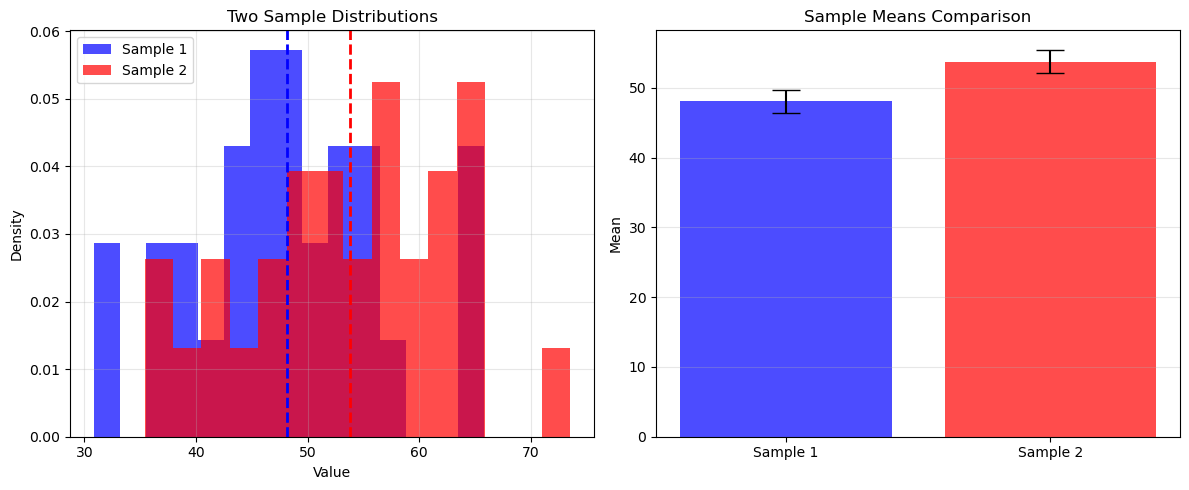


✅ Two-sample t-test performed!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Two-Sample t-Test")
print("=" * 60)

# Generate two samples
np.random.seed(42)
sample1 = np.random.normal(50, 10, 30)
sample2 = np.random.normal(55, 10, 30)  # Slightly different mean

print(f"\nSample 1:")
print(f"  Mean: {np.mean(sample1):.4f}, Std: {np.std(sample1, ddof=1):.4f}, Size: {len(sample1)}")
print(f"\nSample 2:")
print(f"  Mean: {np.mean(sample2):.4f}, Std: {np.std(sample2, ddof=1):.4f}, Size: {len(sample2)}")

# Hypothesis test: H0: μ1 = μ2, H1: μ1 ≠ μ2
alpha = 0.05

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"\nHypothesis Test:")
print(f"  H0: μ1 = μ2 (means are equal)")
print(f"  H1: μ1 ≠ μ2 (means are different)")
print(f"  Significance level (α): {alpha}")
print(f"\nResults:")
print(f"  t-statistic: {t_statistic:.4f}")
print(f"  p-value: {p_value:.6f}")

if p_value < alpha:
    print(f"\n  Decision: Reject H0")
    print(f"  Conclusion: Means are significantly different")
else:
    print(f"\n  Decision: Fail to reject H0")
    print(f"  Conclusion: No significant difference between means")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample1, bins=15, density=True, alpha=0.7, color='blue', label='Sample 1')
plt.hist(sample2, bins=15, density=True, alpha=0.7, color='red', label='Sample 2')
plt.axvline(np.mean(sample1), color='blue', linestyle='--', linewidth=2)
plt.axvline(np.mean(sample2), color='red', linestyle='--', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Two Sample Distributions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
mean_diff = np.mean(sample1) - np.mean(sample2)
print(f"\nMean difference: {mean_diff:.4f}")
plt.bar(['Sample 1', 'Sample 2'], [np.mean(sample1), np.mean(sample2)], yerr=[np.std(sample1, ddof=1)/np.sqrt(len(sample1)), np.std(sample2, ddof=1)/np.sqrt(len(sample2))], alpha=0.7, color=['blue', 'red'], capsize=10)
plt.ylabel('Mean')
plt.title('Sample Means Comparison')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Two-sample t-test performed!")

## Part 3: Chi-Square Test for Independence


In [4]:
print("\n" + "=" * 60)
print("Part 3: Chi-Square Test for Independence")
print("=" * 60)

# Create contingency table
# Example: Relationship between two categorical variables
observed = np.array([[30, 20, 10],
                     [25, 25, 15],
                     [15, 30, 20]])

print("\nObserved frequencies (contingency table):")
print(observed)

# Hypothesis test: H0: Variables are independent, H1: Variables are dependent
alpha = 0.05

# Perform chi-square test
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"\nHypothesis Test:")
print(f"  H0: Variables are independent")
print(f"  H1: Variables are dependent")
print(f"  Significance level (α): {alpha}")
print(f"\nResults:")
print(f"  χ² statistic: {chi2_statistic:.4f}")
print(f"  Degrees of freedom: {dof}")
print(f"  p-value: {p_value:.6f}")
print(f"\nExpected frequencies:")
print(expected)

if p_value < alpha:
    print(f"\n  Decision: Reject H0")
    print(f"  Conclusion: Variables are dependent")
else:
    print(f"\n  Decision: Fail to reject H0")
    print(f"  Conclusion: No evidence of dependence")

print("\n✅ Chi-square test performed!")


Part 3: Chi-Square Test for Independence

Observed frequencies (contingency table):
[[30 20 10]
 [25 25 15]
 [15 30 20]]

Hypothesis Test:
  H0: Variables are independent
  H1: Variables are dependent
  Significance level (α): 0.05

Results:
  χ² statistic: 10.1689
  Degrees of freedom: 4
  p-value: 0.037677

Expected frequencies:
[[22.10526316 23.68421053 14.21052632]
 [23.94736842 25.65789474 15.39473684]
 [23.94736842 25.65789474 15.39473684]]

  Decision: Reject H0
  Conclusion: Variables are dependent

✅ Chi-square test performed!


## Summary

### Key Concepts:
1. **Null Hypothesis (H0)**: Default assumption to test
2. **Alternative Hypothesis (H1)**: Research hypothesis
3. **p-value**: Probability of observing data if H0 is true
4. **Significance Level (α)**: Threshold for rejecting H0 (typically 0.05)
5. **Type I Error**: Rejecting H0 when it's true (false positive)
6. **Type II Error**: Failing to reject H0 when it's false (false negative)

### Test Types:
- **t-test**: Compare means (one-sample, two-sample, paired)
- **z-test**: Compare means when population variance is known
- **Chi-square test**: Test independence of categorical variables

### Best Practices:
- Set significance level before testing
- Interpret p-values correctly (not probability H0 is true)
- Consider effect size, not just statistical significance
- Report confidence intervals along with p-values

### Applications:
- Scientific research
- Quality control
- A/B testing
- Medical studies

**Reference:** Course 03, Unit 5: "Probability and Statistical Inference" - Hypothesis testing practical content